In [80]:
import pandas as pd

In [81]:
hb_df = pd.read_csv('../00_CSV/hotel_bookings.csv')

In [82]:
# Mostrar una descripción inicial de los datos
df_info = hb_df.info()
df_head = hb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [83]:
missing_values = hb_df.isnull().sum()

missing_values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [84]:
# Limpiamos los datos eliminando filas con valores nulos críticos
# Consideramos que lead_time y número de huéspedes son datos importantes para análisis
hb_limp = hb_df.dropna(subset=['lead_time', 'adults', 'children', 'babies'])

In [85]:
# Agregamos una columna que sume el total de huéspedes
hb_limp.loc[:, 'total_guests'] = hb_limp['adults'] + hb_limp['children'] + hb_limp['babies']

/var/folders/gj/ny5jghyx665704696cg6yfdm0000gn/T/ipykernel_77961/2140380341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hb_limp.loc[:, 'total_guests'] = hb_limp['adults'] + hb_limp['children'] + hb_limp['babies']


In [86]:
# Cambiar valores faltantes en columna 'children'
hb_limp.loc['children'] = hb_limp['children'].fillna(0)

/var/folders/gj/ny5jghyx665704696cg6yfdm0000gn/T/ipykernel_77961/3357194946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hb_limp.loc['children'] = hb_limp['children'].fillna(0)


In [87]:
hb_limp

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119386,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2.0,5.0,3.0,...,9.0,NaN,0.0,Transient,225.43,0.0,2.0,Check-Out,2017-09-07,3.0
119387,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,9.0,NaN,0.0,Transient,157.71,0.0,4.0,Check-Out,2017-09-07,2.0
119388,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,89.0,NaN,0.0,Transient,104.40,0.0,0.0,Check-Out,2017-09-07,2.0
119389,City Hotel,0.0,205.0,2017.0,August,35.0,29.0,2.0,7.0,2.0,...,9.0,NaN,0.0,Transient,151.20,0.0,2.0,Check-Out,2017-09-07,2.0


In [88]:
hb_limp.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,...,119386.000000,119386.000000,119386.000000,103048.000000,6797.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,...,0.087121,0.137102,0.221131,86.694841,189.266735,2.321227,101.833541,0.062520,0.571340,1.968229
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,...,0.844350,1.497462,0.652315,110.775127,131.655015,17.595011,50.534664,0.245295,0.792798,0.722400
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.590000,0.000000,0.000000,2.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000


In [89]:
import matplotlib.pyplot as plt

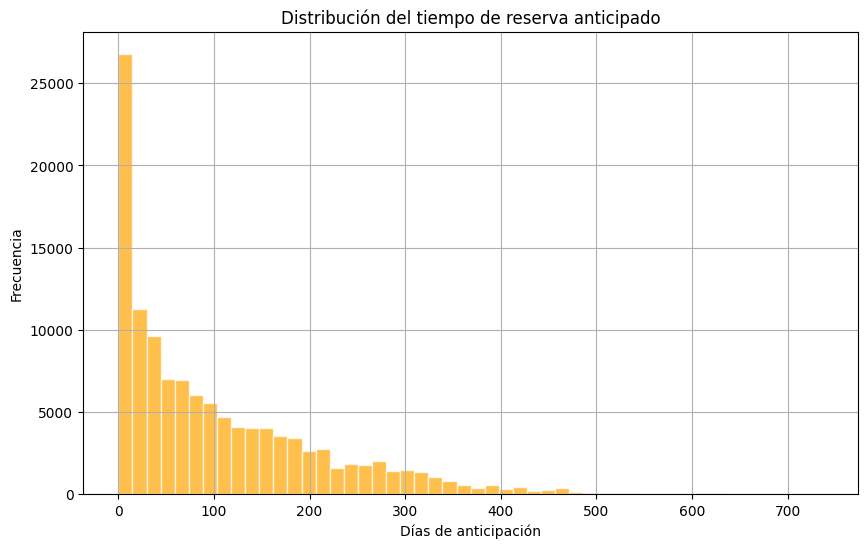

In [90]:
# Visualizamos la distribución del tiempo de reserva anticipado (lead_time)
plt.figure(figsize=(10, 6))
plt.hist(hb_limp['lead_time'], bins=50, edgecolor='w', alpha=0.7, color='orange')
plt.title('Distribución del tiempo de reserva anticipado')
plt.xlabel('Días de anticipación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**CONCLUSIONES**
- <b>lead_time</b> Observamos que la mayoría de las reservas se hacen con una anticipación de menos de 200 


Vamos a estudiar los outliers para tratar de identificarlos y tratarlos

In [91]:
import numpy as np

In [92]:
# Calculamos los cuartiles y el rango intercuartil (IQR) para lead_time
Q1 = hb_limp['lead_time'].quantile(0.25)
Q3 = hb_limp['lead_time'].quantile(0.75)
IQR = Q3 - Q1

In [93]:
# Definimos los límites inferior y superior
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

In [94]:
# Identifico valores outliers
outliers = hb_limp[(hb_limp['lead_time'] < limite_inf) | (hb_limp['lead_time'] > limite_sup)]

In [95]:
outliers

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01,2.0
225,Resort Hotel,0.0,394.0,2015.0,July,28.0,8.0,2.0,5.0,2.0,...,40.0,NaN,0.0,Contract,89.68,0.0,0.0,Check-Out,2015-07-15,2.0
890,Resort Hotel,0.0,460.0,2015.0,August,32.0,3.0,2.0,5.0,1.0,...,40.0,NaN,0.0,Contract,77.54,0.0,0.0,Check-Out,2015-08-10,1.0
1516,Resort Hotel,0.0,381.0,2015.0,September,36.0,1.0,4.0,10.0,2.0,...,40.0,NaN,0.0,Contract,82.88,0.0,0.0,Check-Out,2015-09-15,2.0
1672,Resort Hotel,0.0,382.0,2015.0,September,37.0,8.0,4.0,10.0,2.0,...,40.0,NaN,0.0,Contract,76.50,0.0,0.0,Check-Out,2015-09-22,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119102,City Hotel,0.0,518.0,2017.0,August,34.0,26.0,2.0,1.0,1.0,...,229.0,NaN,0.0,Transient-Party,0.00,0.0,0.0,Check-Out,2017-08-29,1.0
119107,City Hotel,0.0,518.0,2017.0,August,34.0,26.0,2.0,1.0,2.0,...,229.0,NaN,0.0,Transient-Party,112.67,0.0,1.0,Check-Out,2017-08-29,2.0
119109,City Hotel,0.0,518.0,2017.0,August,34.0,26.0,2.0,1.0,2.0,...,229.0,NaN,0.0,Transient-Party,112.67,0.0,1.0,Check-Out,2017-08-29,2.0
119111,City Hotel,0.0,518.0,2017.0,August,34.0,26.0,2.0,1.0,2.0,...,229.0,NaN,0.0,Transient-Party,112.67,0.0,1.0,Check-Out,2017-08-29,2.0


In [96]:
# Creamos un nuevo DataFrame sin outliers para análisis comparativo
hb_no_outliers = hb_limp[(hb_limp['lead_time'] >= limite_inf) & (hb_limp['lead_time'] <= limite_sup)]

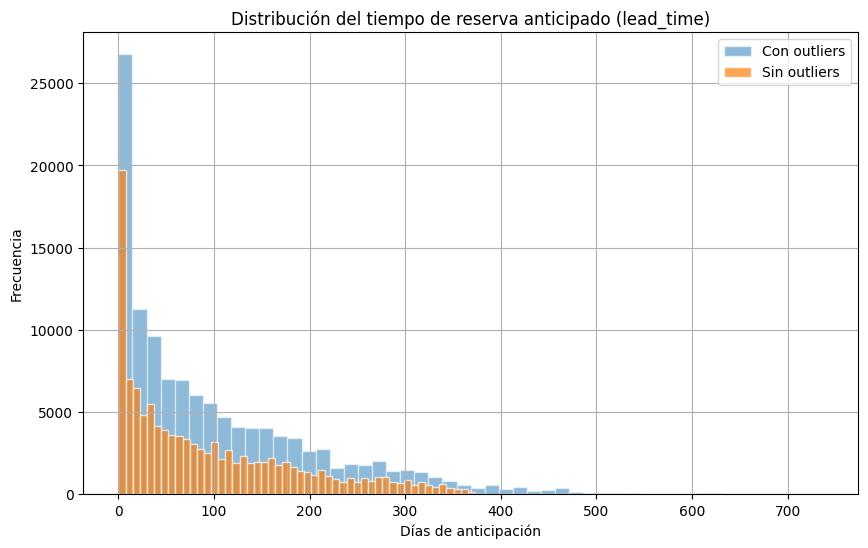

In [97]:
# Visualizar la distribución de lead_time con y sin outliers
plt.figure(figsize=(10, 6))
plt.hist(hb_limp['lead_time'], bins=50, edgecolor='w', alpha=0.5, label='Con outliers')
plt.hist(hb_no_outliers['lead_time'], bins=50, edgecolor='w', alpha=0.7, label='Sin outliers')
plt.title('Distribución del tiempo de reserva anticipado (lead_time)')
plt.xlabel('Días de anticipación')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

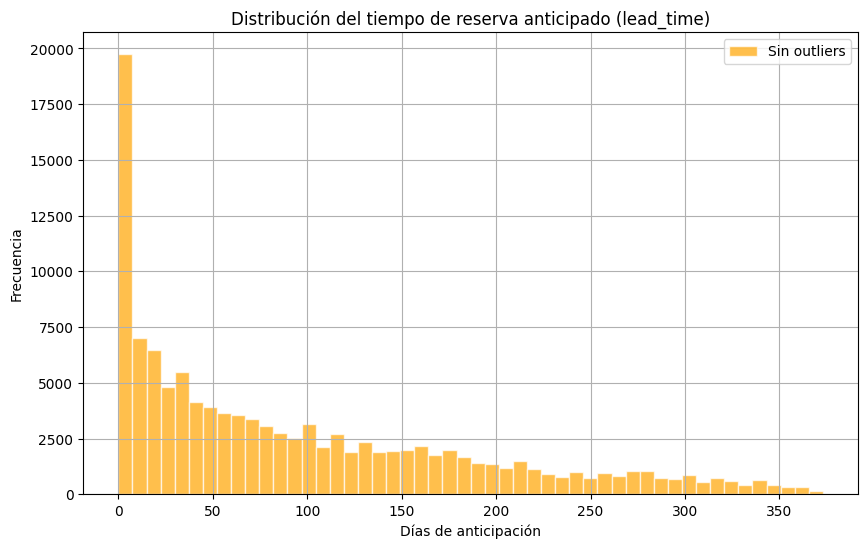

In [98]:
# Visualizar la distribución de lead_time con y sin outliers
plt.figure(figsize=(10, 6))
plt.hist(hb_no_outliers['lead_time'], bins=50, edgecolor='w', alpha=0.7, label='Sin outliers', color='orange')
plt.title('Distribución del tiempo de reserva anticipado (lead_time)')
plt.xlabel('Días de anticipación')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

**CONCLUSIONES**
- <b>Outliers</b> La distribución sin outliers tiene una forma más concentrada y es más representativa de la mayoría de las reservas 

In [99]:
market_segment_counts = hb_limp['market_segment'].value_counts()


In [100]:
market_segment_counts

market_segment
Online TA        56476
Offline TA/TO    24219
Groups           19811
Direct           12605
Corporate         5295
Complementary      743
Aviation           237
Name: count, dtype: int64

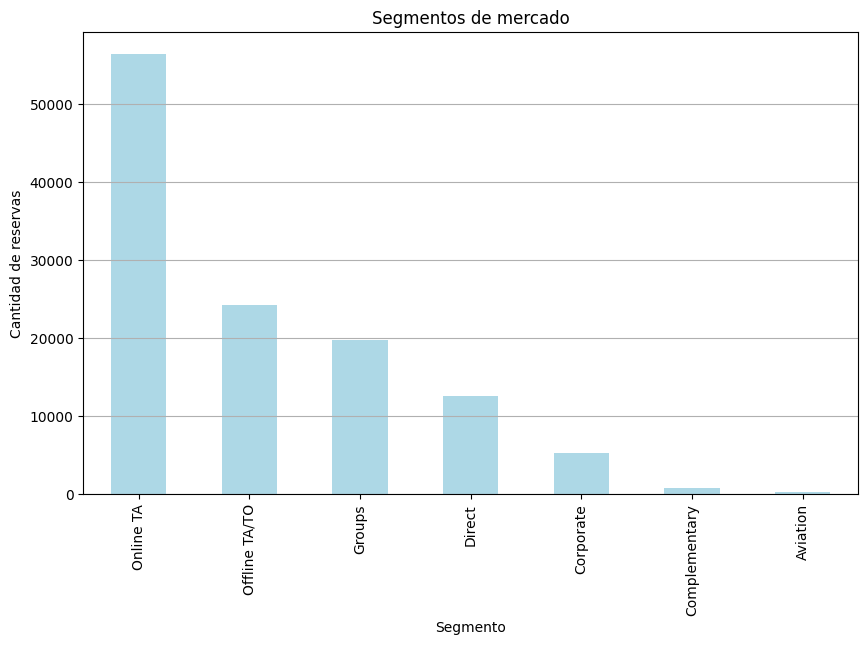

In [101]:
# Analiza la distribución del mercado (market segment)
plt.figure(figsize=(10, 6))
market_segment_counts.plot(kind='bar', color='lightblue')
plt.title('Segmentos de mercado')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de reservas')
plt.grid(axis='y')
plt.show()

**CONCLUSIONES**
- Online TA 47,30% : La mayoría de los clientes provienen de agencias de viajes en línea, como Booking.com, Expedia, etc. Este valor refleja la importancia del mercado digital. Una buena estrategia en plataformas online tiene un impacto directo en los ingresos.
- Offline TA/TO 20,28% : Parte significativa de las reservas realizadas a través de agentes o operadores tradicionales. Estos segmentos son más tradicionales pero estables, ideales para garantizar la ocupación en temporadas bajas.
- Groups 16,59% : Reservas en grupo, garantizan un volumen de ocupación alto que ayuda a rentabilizar los recursos, catering, transporte, servicios..

- Generales: Con estos 3 grupos tenemos más de un 84,17∞ de las reservas pudiendo considerarlo una muestra más que significativa

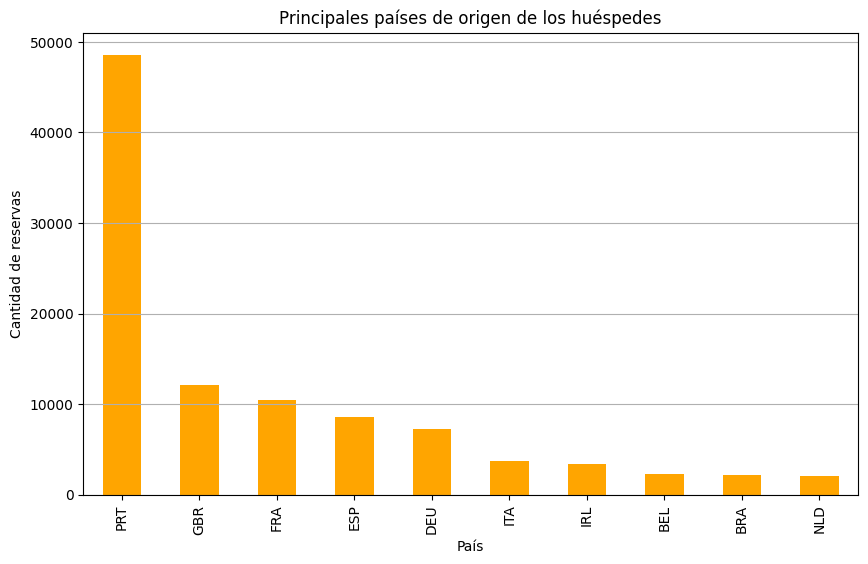

In [102]:
# Distribución de huéspedes por país
top_countries = hb_limp['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='orange')
plt.title('Principales países de origen de los huéspedes')
plt.xlabel('País')
plt.ylabel('Cantidad de reservas')
plt.grid(axis='y')
plt.show()